**Pontifícia Universidade Católica do Paraná**

**Bacharelado em Ciência da Computação**

**Trabalho de Conclusão de Curso**

Eduardo Klein Nakatani

## Neural Network

Redes neurais são modelos computacionais inspirados no funcionamento do cérebro humano, que consistem em uma coleção interconectada de unidades de processamento, chamadas de neurônios artificiais ou nós, organizados em camadas. Essas redes são capazes de aprender e generalizar padrões complexos a partir de um conjunto de dados de entrada, permitindo a realização de tarefas como reconhecimento de padrões, classificação, previsão e tomada de decisões.

## Bibliotecas e funções
Nessa seção são importadas as bibliotecas e funções que serão utilizadas no decorrer do trabalho.

In [22]:
# Importa as bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [23]:
# define algoritmos de avaliação dos resultados
def evaluate(y_test, y_pred):
  return f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

## Base de dados

Nessa seção é feita a definição dos caminhos dos dados a serem utilizados. No caso serão utilizados espectogramas

In [10]:
# Definir caminho dos dados de treino e validação
train_dir = '../data/spectogram/train'
valid_dir = '../data/spectogram/validation'

# Definir hiperparâmetros do modelo
batch_size = 10
epochs = 20
input_shape = (930, 462, 3) # tamanho das imagens de entrada


In [11]:
# Criar gerador de dados de treino e validação
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 18 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


### Criação do modelo

Nessa seção é criado o modelo da rede neural.

In [12]:
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Adicionar camadas adicionais para adaptar o modelo ao nosso problema de classificação de imagens
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#### Estrutura da rede

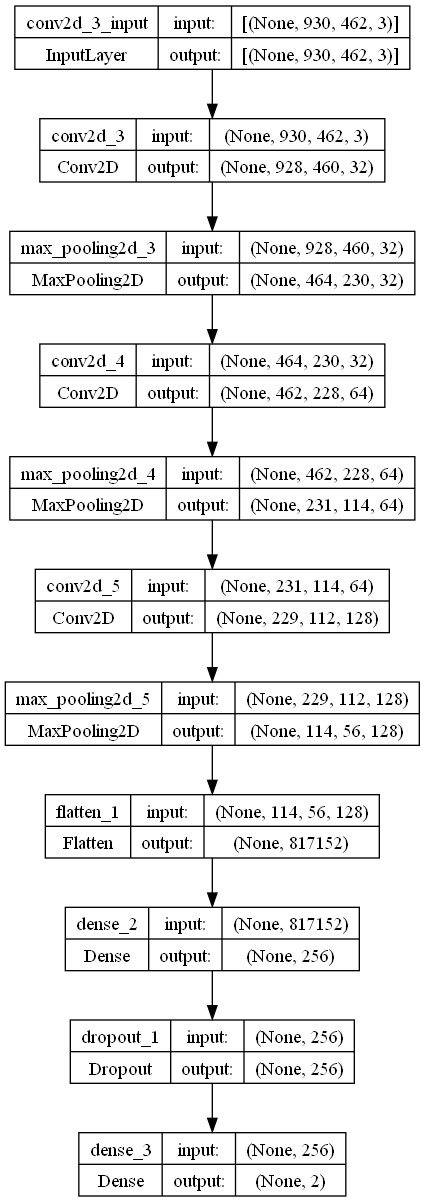

In [14]:
# plot network
keras.utils.plot_model(model, show_shapes=True)


### Compilação e treinamento

In [15]:
# Compilar modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# Treinar modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    
    validation_data=valid_generator,
    verbose=1
)

Epoch 1/20
2/2 [==============================] - 6s 3s/step - loss: 1.3426 - accuracy: 0.6667 - val_loss: 1.0183 - val_accuracy: 0.7500
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: 4.3849 - accuracy: 0.5000 - val_loss: 1.6423 - val_accuracy: 0.2500
Epoch 3/20
2/2 [==============================] - 5s 2s/step - loss: 1.7769 - accuracy: 0.6111 - val_loss: 1.2756 - val_accuracy: 0.7500
Epoch 4/20
2/2 [==============================] - 5s 3s/step - loss: 1.4731 - accuracy: 0.6667 - val_loss: 0.6164 - val_accuracy: 0.7500
Epoch 5/20
2/2 [==============================] - 5s 2s/step - loss: 0.7933 - accuracy: 0.5556 - val_loss: 0.7086 - val_accuracy: 0.4167
Epoch 6/20
2/2 [==============================] - 5s 3s/step - loss: 0.6288 - accuracy: 0.6667 - val_loss: 0.5718 - val_accuracy: 0.7500
Epoch 7/20
2/2 [==============================] - 5s 2s/step - loss: 0.6282 - accuracy: 0.6667 - val_loss: 0.6030 - val_accuracy: 0.7500
Epoch 8/20
2/2 [=========================

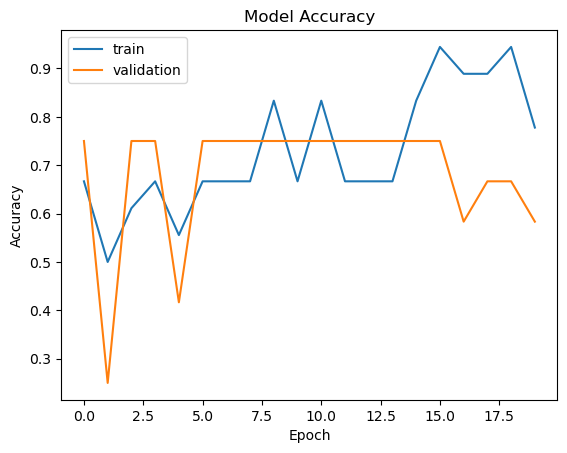

In [18]:
from matplotlib import pyplot as plt

#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Avaliação do modelo

In [28]:
# get confusion matrix from validation data
from sklearn.metrics import confusion_matrix
import numpy as np

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=input_shape[:2], batch_size=1, class_mode='categorical', shuffle=False)

Y_pred = model.predict_generator(valid_generator, valid_generator.samples // valid_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


matrix = confusion_matrix(valid_generator.classes, y_pred)


Found 12 images belonging to 2 classes.


C:\Users\a449460\AppData\Local\Temp\ipykernel_31172\1746501334.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(valid_generator, valid_generator.samples // valid_generator.batch_size+1)


### Matriz de confusão

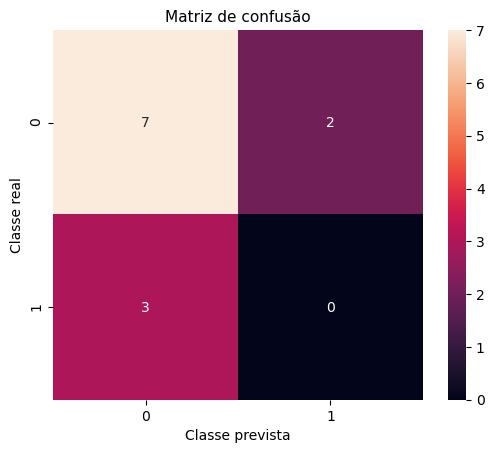

In [36]:
#plotando a matriz de confusão
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
title = 'Matriz de confusão'

sns.heatmap(matrix, annot=True, square = True)

plt.ylabel('Classe real')
plt.xlabel('Classe prevista')

plt.title(title, size = 11)

plt.show()

In [ ]:
#save model
model.save('nn_model.h5')